In [1]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 94.8MB/s 
     |████████████████████████████████| 3.1MB 45.1MB/s 
     |████████████████████████████████| 501kB 47.7MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

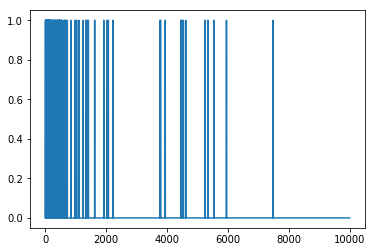

In [5]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])
plt.show()

In [7]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)



W0725 00:36:58.839264 139624204162944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5317 - accuracy: 0.7730 - binary_crossentropy: 0.5317 - val_loss: 0.3786 - val_accuracy: 0.8660 - val_binary_crossentropy: 0.3786
Epoch 2/20
25000/25000 - 3s - loss: 0.2769 - accuracy: 0.9068 - binary_crossentropy: 0.2769 - val_loss: 0.2903 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2903
Epoch 3/20
25000/25000 - 3s - loss: 0.1968 - accuracy: 0.9316 - binary_crossentropy: 0.1968 - val_loss: 0.2863 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2863
Epoch 4/20
25000/25000 - 3s - loss: 0.1586 - accuracy: 0.9456 - binary_crossentropy: 0.1586 - val_loss: 0.3042 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.3042
Epoch 5/20
25000/25000 - 3s - loss: 0.1307 - accuracy: 0.9567 - binary_crossentropy: 0.1307 - val_loss: 0.3220 - val_accuracy: 0.8773 - val_binary_crossentropy: 0.3220
Epoch 6/20
25000/25000 - 3s - loss: 0.1100 - accuracy: 0.9656 - binary_crossentropy: 0.1100 - val_loss: 0.3478

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6347 - accuracy: 0.6250 - binary_crossentropy: 0.6347 - val_loss: 0.5845 - val_accuracy: 0.6887 - val_binary_crossentropy: 0.5845
Epoch 2/20
25000/25000 - 3s - loss: 0.5376 - accuracy: 0.7902 - binary_crossentropy: 0.5376 - val_loss: 0.5254 - val_accuracy: 0.7844 - val_binary_crossentropy: 0.5254
Epoch 3/20
25000/25000 - 3s - loss: 0.4824 - accuracy: 0.8538 - binary_crossentropy: 0.4824 - val_loss: 0.4908 - val_accuracy: 0.8182 - val_binary_crossentropy: 0.4908
Epoch 4/20
25000/25000 - 3s - loss: 0.4435 - accuracy: 0.8864 - binary_crossentropy: 0.4435 - val_loss: 0.4654 - val_accuracy: 0.8466 - val_binary_crossentropy: 0.4654
Epoch 5/20
25000/25000 - 3s - loss: 0.4130 - accuracy: 0.9074 - binary_crossentropy: 0.4130 - val_loss: 0.4500 - val_accuracy: 0.8525 - val_binary_crossentropy: 0.4500
Epoch 6/20
25000/25000 - 3s - loss: 0.3880 - accuracy: 0.9214 - binary_crossentropy: 0.3880 - val_loss: 0.4353

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 15s - loss: 0.3465 - accuracy: 0.8521 - binary_crossentropy: 0.3465 - val_loss: 0.2967 - val_accuracy: 0.8799 - val_binary_crossentropy: 0.2967
Epoch 2/20
25000/25000 - 14s - loss: 0.1489 - accuracy: 0.9455 - binary_crossentropy: 0.1489 - val_loss: 0.3361 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3361
Epoch 3/20
25000/25000 - 14s - loss: 0.0537 - accuracy: 0.9848 - binary_crossentropy: 0.0537 - val_loss: 0.4560 - val_accuracy: 0.8668 - val_binary_crossentropy: 0.4560
Epoch 4/20
25000/25000 - 14s - loss: 0.0092 - accuracy: 0.9983 - binary_crossentropy: 0.0092 - val_loss: 0.5674 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.5674
Epoch 5/20
25000/25000 - 14s - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6590 - val_accuracy: 0.8681 - val_binary_crossentropy: 0.6590
Epoch 6/20
25000/25000 - 14s - loss: 2.7437e-04 - accuracy: 1.0000 - binary_crossentropy: 2.7437e-04 - va

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

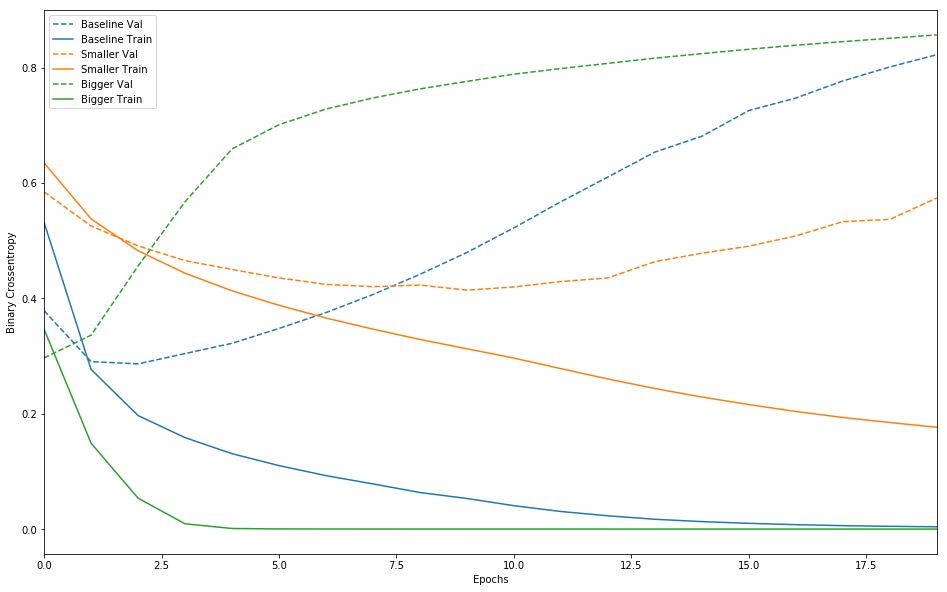

In [14]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

    


In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])



In [16]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5528 - accuracy: 0.8017 - binary_crossentropy: 0.5168 - val_loss: 0.4042 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.3672
Epoch 2/20
25000/25000 - 3s - loss: 0.3231 - accuracy: 0.9004 - binary_crossentropy: 0.2807 - val_loss: 0.3370 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2905
Epoch 3/20
25000/25000 - 3s - loss: 0.2646 - accuracy: 0.9238 - binary_crossentropy: 0.2153 - val_loss: 0.3339 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2828
Epoch 4/20
25000/25000 - 3s - loss: 0.2398 - accuracy: 0.9345 - binary_crossentropy: 0.1869 - val_loss: 0.3418 - val_accuracy: 0.8833 - val_binary_crossentropy: 0.2877
Epoch 5/20
25000/25000 - 3s - loss: 0.2231 - accuracy: 0.9422 - binary_crossentropy: 0.1681 - val_loss: 0.3515 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.2956
Epoch 6/20
25000/25000 - 3s - loss: 0.2108 - accuracy: 0.9484 - binary_crossentropy: 0.1540 - val_loss: 0.3612

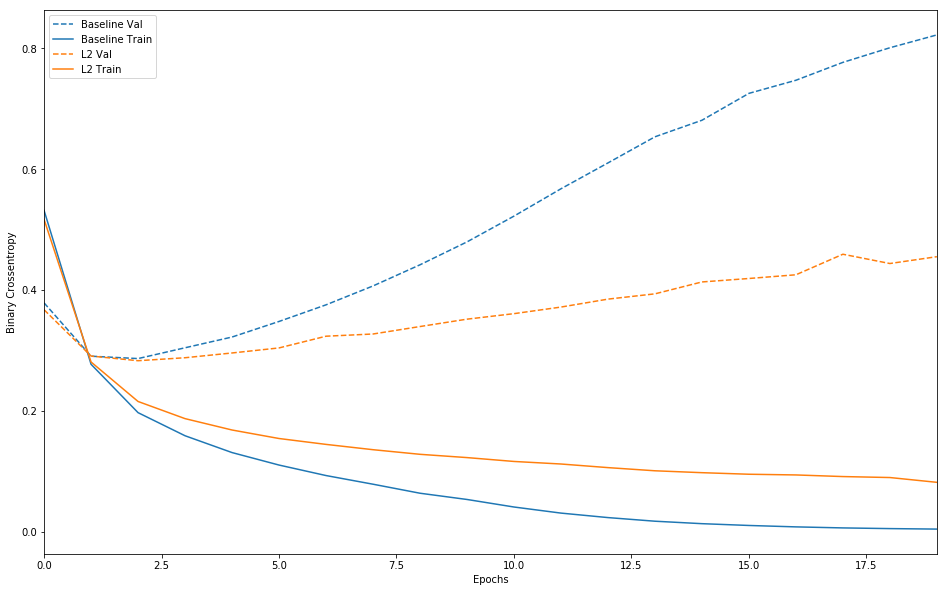

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])
    


In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6224 - accuracy: 0.6384 - binary_crossentropy: 0.6224 - val_loss: 0.4723 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.4723
Epoch 2/20
25000/25000 - 3s - loss: 0.4467 - accuracy: 0.8055 - binary_crossentropy: 0.4467 - val_loss: 0.3315 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3315
Epoch 3/20
25000/25000 - 3s - loss: 0.3467 - accuracy: 0.8663 - binary_crossentropy: 0.3467 - val_loss: 0.2928 - val_accuracy: 0.8841 - val_binary_crossentropy: 0.2928
Epoch 4/20
25000/25000 - 3s - loss: 0.2894 - accuracy: 0.8921 - binary_crossentropy: 0.2894 - val_loss: 0.2750 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.2750
Epoch 5/20
25000/25000 - 3s - loss: 0.2441 - accuracy: 0.9092 - binary_crossentropy: 0.2441 - val_loss: 0.2780 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2780
Epoch 6/20
25000/25000 - 3s - loss: 0.2108 - accuracy: 0.9223 - binary_crossentropy: 0.2108 - val_loss: 0.2890

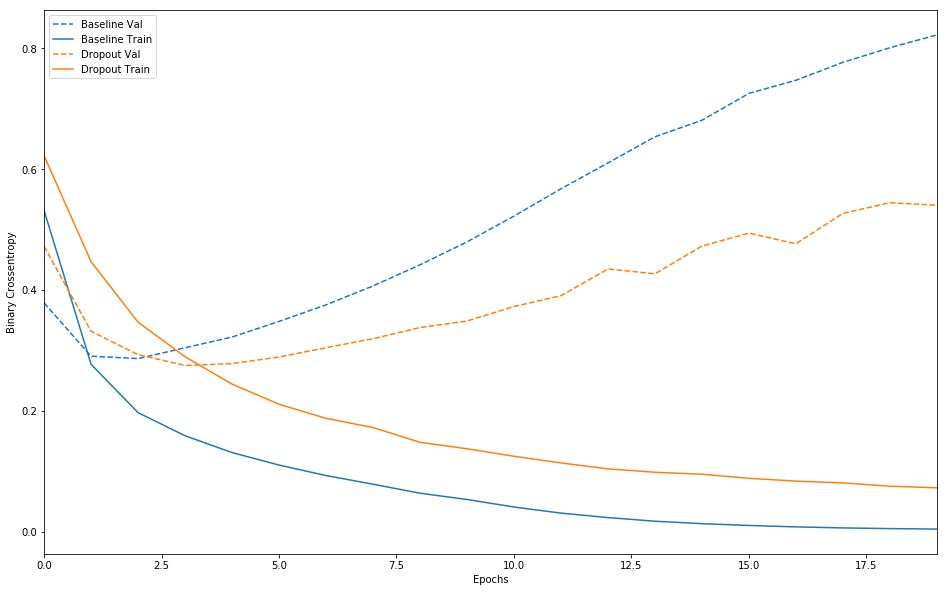

In [19]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])  